# Qiskit Lab1

## Quantum circuit and logic operation 

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator


In [2]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw()
    
    # We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

In [3]:
qc, output=NOT("0")

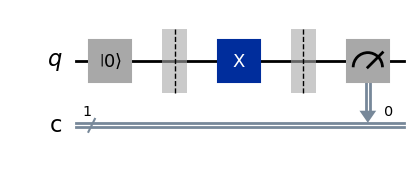

In [4]:
qc.draw(output="mpl")

In [5]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    
    
    
    
    
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = AerSimulator()
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes

    
    
    
    
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## Part2: Running simulation on a fake noisy quantum computer

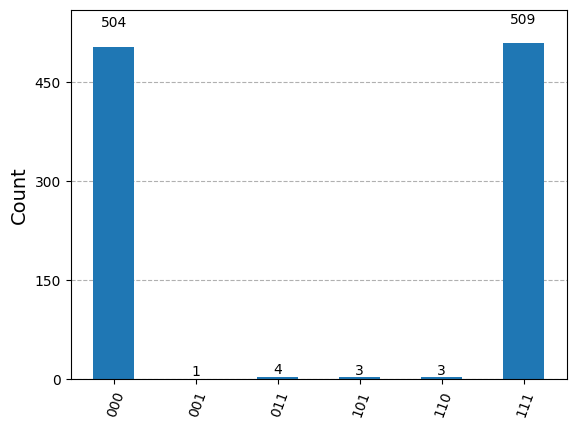

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
 
# Generate a 5-qubit simulated backend
backend = GenericBackendV2(num_qubits=5)
 
# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw('mpl')
 
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl')
 
# Run the transpiled circuit using the simulated backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

In [5]:
backend.coupling_map.draw()

RuntimeError: Graphviz could not be found or run. This function requires that Graphviz is installed. If you need to install Graphviz you can refer to: https://graphviz.org/download/#executable-packages for instructions.